# Decision Trees, Random Forests and the Confusion Matrix for Evaluation
## Data Mining Catawba College
## Group Members:
## 1. Turner Bass
## 2.



# Directions: Open in COLAB.  Carefully study the documentation and execute the code.  Answer the questions throughout the lab and at the end of the lab. They are labeled "Question 1" etc. Save your work and turn in the .ipynb file.

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

### Research Goal:  Develop a predictive model using decision trees to determine applicants that are most likely to be able to pay back their loans.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the original data from [here](https://www.lendingclub.com/info/download-data.action) but we are using a csv provided as it has been cleaned of NA values or NULL values.

### Data Understanding - Here are what the columns represent:
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* fully.paid - yes or 1 if the loan was paid back in full (yes is good), no or 0  means it was not paid back in full

# 1.  Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.  Remember this file has the NULL values removed. **

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/loan_data_prep.csv')

## 3. Look at the first few records, the attributes, and attributes types.
** Check out the info(), head(), and describe() methods on loans.**

In [33]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,1
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,1
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,1
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  fully.paid         9578 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 823.2 KB


In [35]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.839946
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,1.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,1.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,1.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,1.000000


##  4.  Exploratory Data Analysis:  Visualization

Let's do some data visualization!

Text(0.5, 0, 'FICO')

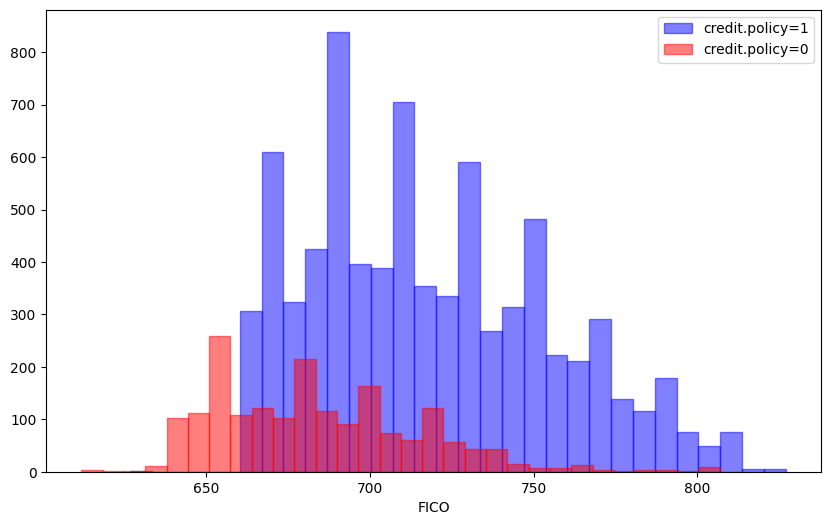

In [40]:
plt.figure(figsize=(10,6))
plt.hist(df[df['credit.policy']==1]['fico'],color='blue',bins=30,alpha=0.5,edgecolor='blue')
plt.hist(df[df['credit.policy']==0]['fico'],color='red',bins=30,alpha=0.5,edgecolor='red')
plt.legend(['credit.policy=1','credit.policy=0'])
plt.xlabel("FICO")


## QUESTION 1:  (open up the markdown cell and key in your answer).  What does the above chart show about the relationship of FICO score and Credit Policy?<br>

## Answer: This shows the higher the FICO score the lower the credit policy will be.

** Create a histogram -  select by the not.fully.paid column.**<br>
** fully paid = 1 is good **

Text(0.5, 0, 'FICO')

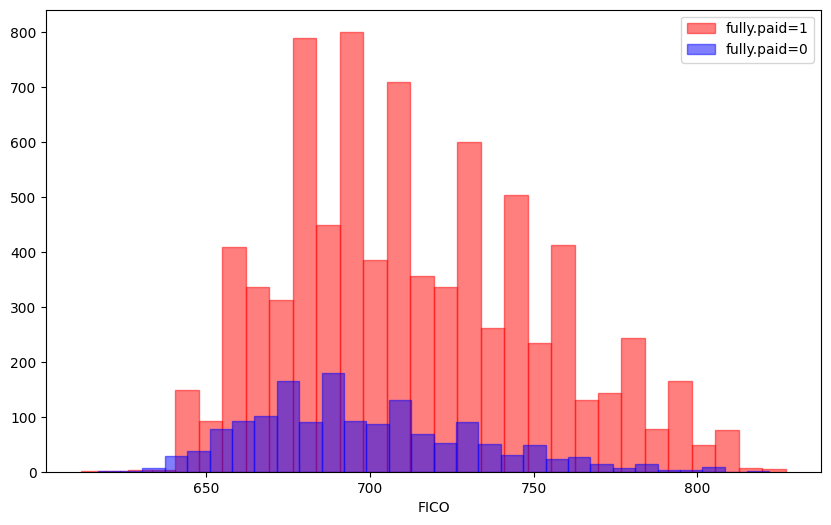

In [43]:
plt.figure(figsize=(10,6))
plt.hist(df[df['fully.paid']==1]['fico'],color='red',bins=30,alpha=0.5,edgecolor='red')
plt.hist(df[df['fully.paid']==0]['fico'],color='blue',bins=30,alpha=0.5,edgecolor='blue')
plt.legend(['fully.paid=1','fully.paid=0'])
plt.xlabel("FICO")

## QUESTION 2: What does the above chart show about the relationship of FICO score and Not Fully Paid?<br>

## Answer: This shows that the higher the FICO score the less likely someone is to have not fully paid which means people with lower FICO score are more likely to have not paid.


** Let's see the trend between FICO score and interest rate.**

In [75]:
!pip install seaborn

In [76]:
import seaborn as sns

In [77]:
sns.jointplot?

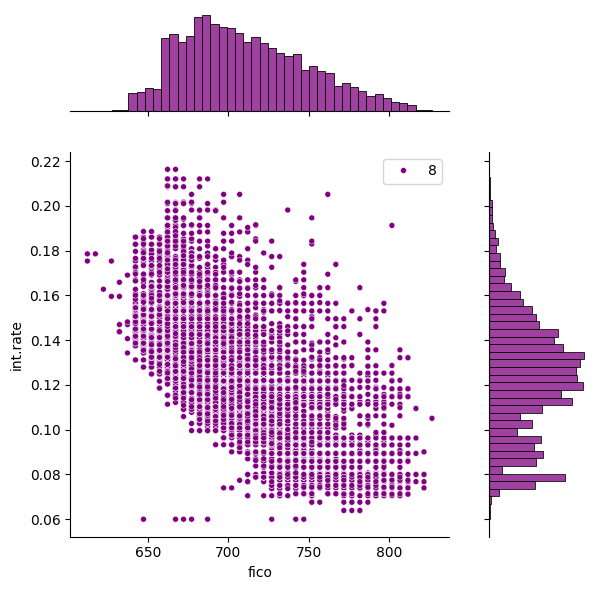

In [78]:
sns.jointplot(data=df, x='fico', y='int.rate', color='purple', size=8, ratio=3, space=0.4)

In [46]:
import seaborn as sns

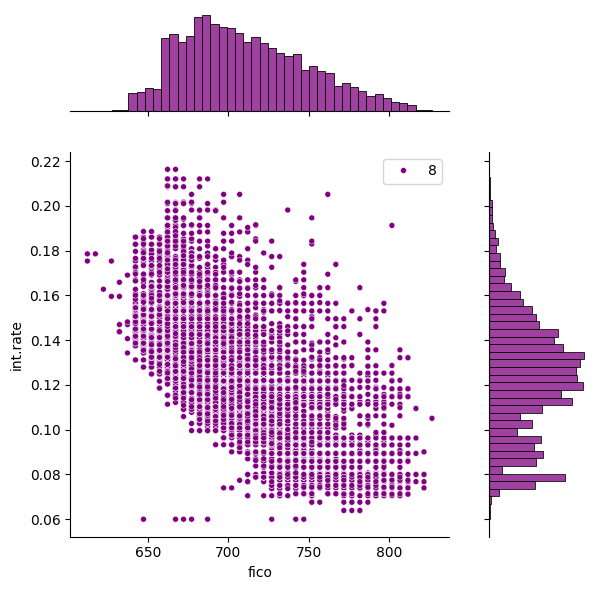

In [47]:
sns.jointplot(x='fico', y='int.rate', data=df, color='purple', size=8, ratio=3, space=0.4)

## QUESTION 3: In the chart above, do you see a trend between FICO score and Interest Rate?<br>

## Answer: Yes, there is a trong negative linear trend. this shows that the higher the Fico score the lower the intrest rate.


** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.**

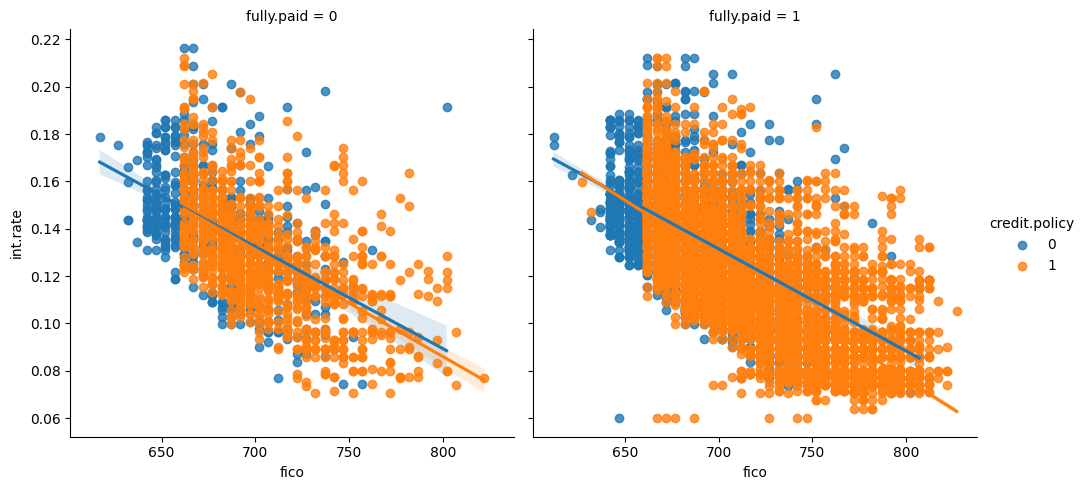

In [51]:
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='fully.paid')

## QUESTION 4: What do the above two charts show regarding the trend between FICO score and Interest Rate, and how it may or may not differ depending on the "Not Fully Paid" Attribute? <br>

## Answer: They both show a similar output being that as the FICO score increases the intrest rate decreases, the not fully paid attribute does move the trend line marginally but not enough to make a difference due to most of the people who have not fully paid already have a low trending FICO score anyways.

## 5.  Data Preparation

Let's get our data ready for decision trees and random forest modeling.  <br><br>
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.<br><br>
Random Forests are like a collection of decision trees taken from random samples from the data:
It works in four steps:<br>   Select random samples from a given dataset.<br>
    Construct a decision tree for each sample and get a prediction result from each decision tree.<br>
    Perform a vote for each predicted result.<br>
    Select the prediction result with the most votes as the final prediction.<br><br>
Random Forests almost always outperform Decision Trees.


** Let's start by checking loans.info() again.**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  fully.paid         9578 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 823.2 KB


### We are using Python's scikit-learn to make our modeling process easier with this powerful library.<br><br>
<p>It is important to understand how to prepare data for each type of modeling.</p>
<p> We have a target variable, Not Fully Paid, to predict if we are going to get paid back or not. Since we have a target variable this is Supervised learning.</p><p>We have already removed nulls, this is generally important although just simply removing them isn't always the best practice because you might remove too much of the data!  More on this later.  </p>
<p>Decision trees handle numerical values and categorical values, although scikit-learn requires us to change the categorical variables to "dummy" variables.  This means if we have a Cateorical Variable Direction with North, South, East and West as the possible categories, this will change to three variables (not four) North, South, and East.  If the direction for a particular record was "North", then North will have "1" and the rest will have "0". If the direction is "West" then the three will have 0 . . . all 0's mean the last category or West.</p>
<p>The original data set has a categorical feature "Loan Purpose" which has been removed from the data due to its lack of importance in the prediction</p>
<p> Numerical features for decision trees do not have to be "normalized" meaning if you have numerical variables in different ranges, you do not have to convert them to a similar scale.</p>


### Train and Test.  We train our model on the training data, and test the accuracy of the model we have built on test.

Now its time to split our data into a training set and a testing set!

In [53]:
# our target is the fully paid variable
# the train set will be trained on the target so we can learn what it means
# again this is supervised learning
# we will test our model on the test set
X = df.drop('fully.paid',axis=1)
y = df['fully.paid']

In [54]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [55]:
# train will have 70% of the data, test will have 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

## 6.  Modeling:  Training a Decision Tree Model

Let's start by training a single decision tree first!

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [57]:
dTree = DecisionTreeClassifier()

In [58]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.36759453928331015, 0.9821428571428571, 'x[0] <= 0.5\ngini = 0.272\nsamples = 6704\nvalue = [1090, 5614]'),
 Text(0.16130322032673125, 0.9464285714285714, 'x[2] <= 349.935\ngini = 0.408\nsamples = 1317\nvalue = [376, 941]'),
 Text(0.11360597079658812, 0.9107142857142857, 'x[9] <= 6.5\ngini = 0.378\nsamples = 943\nvalue = [239, 704]'),
 Text(0.06334032094838803, 0.875, 'x[1] <= 0.084\ngini = 0.36\nsamples = 815\nvalue = [192, 623]'),
 Text(0.06218375018071418, 0.8392857142857143, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.06449689171606188, 0.8392857142857143, 'x[8] <= 50.95\ngini = 0.368\nsamples = 789\nvalue = [192, 597]'),
 Text(0.01828375740928148, 0.8035714285714286, 'x[8] <= 47.35\ngini = 0.324\nsamples = 344\nvalue = [70, 274]'),
 Text(0.017127186641607634, 0.7678571428571429, 'x[3] <= 9.818\ngini = 0.343\nsamples = 319\nvalue = [70, 249]'),
 Text(0.007517709989880006, 0.7321428571428571, 'x[2] <= 78.13\ngini = 0.464\nsamples = 41\nvalue = [15, 26]'),
 Text(0.00

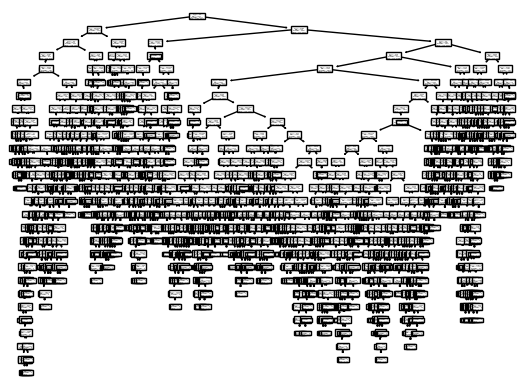

In [59]:
# this may take a few minutes to run
tree.plot_tree(dTree)

In [60]:
#Lets take a look
#this also takes a minute . . . or two
text_representation = tree.export_text(dTree)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 349.93
|   |   |--- feature_9 <= 6.50
|   |   |   |--- feature_1 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.08
|   |   |   |   |--- feature_8 <= 50.95
|   |   |   |   |   |--- feature_8 <= 47.35
|   |   |   |   |   |   |--- feature_3 <= 9.82
|   |   |   |   |   |   |   |--- feature_2 <= 78.13
|   |   |   |   |   |   |   |   |--- feature_2 <= 44.66
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 20.20
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 39.12
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  39.12
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  20.20
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  44.66
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  78.13
| 

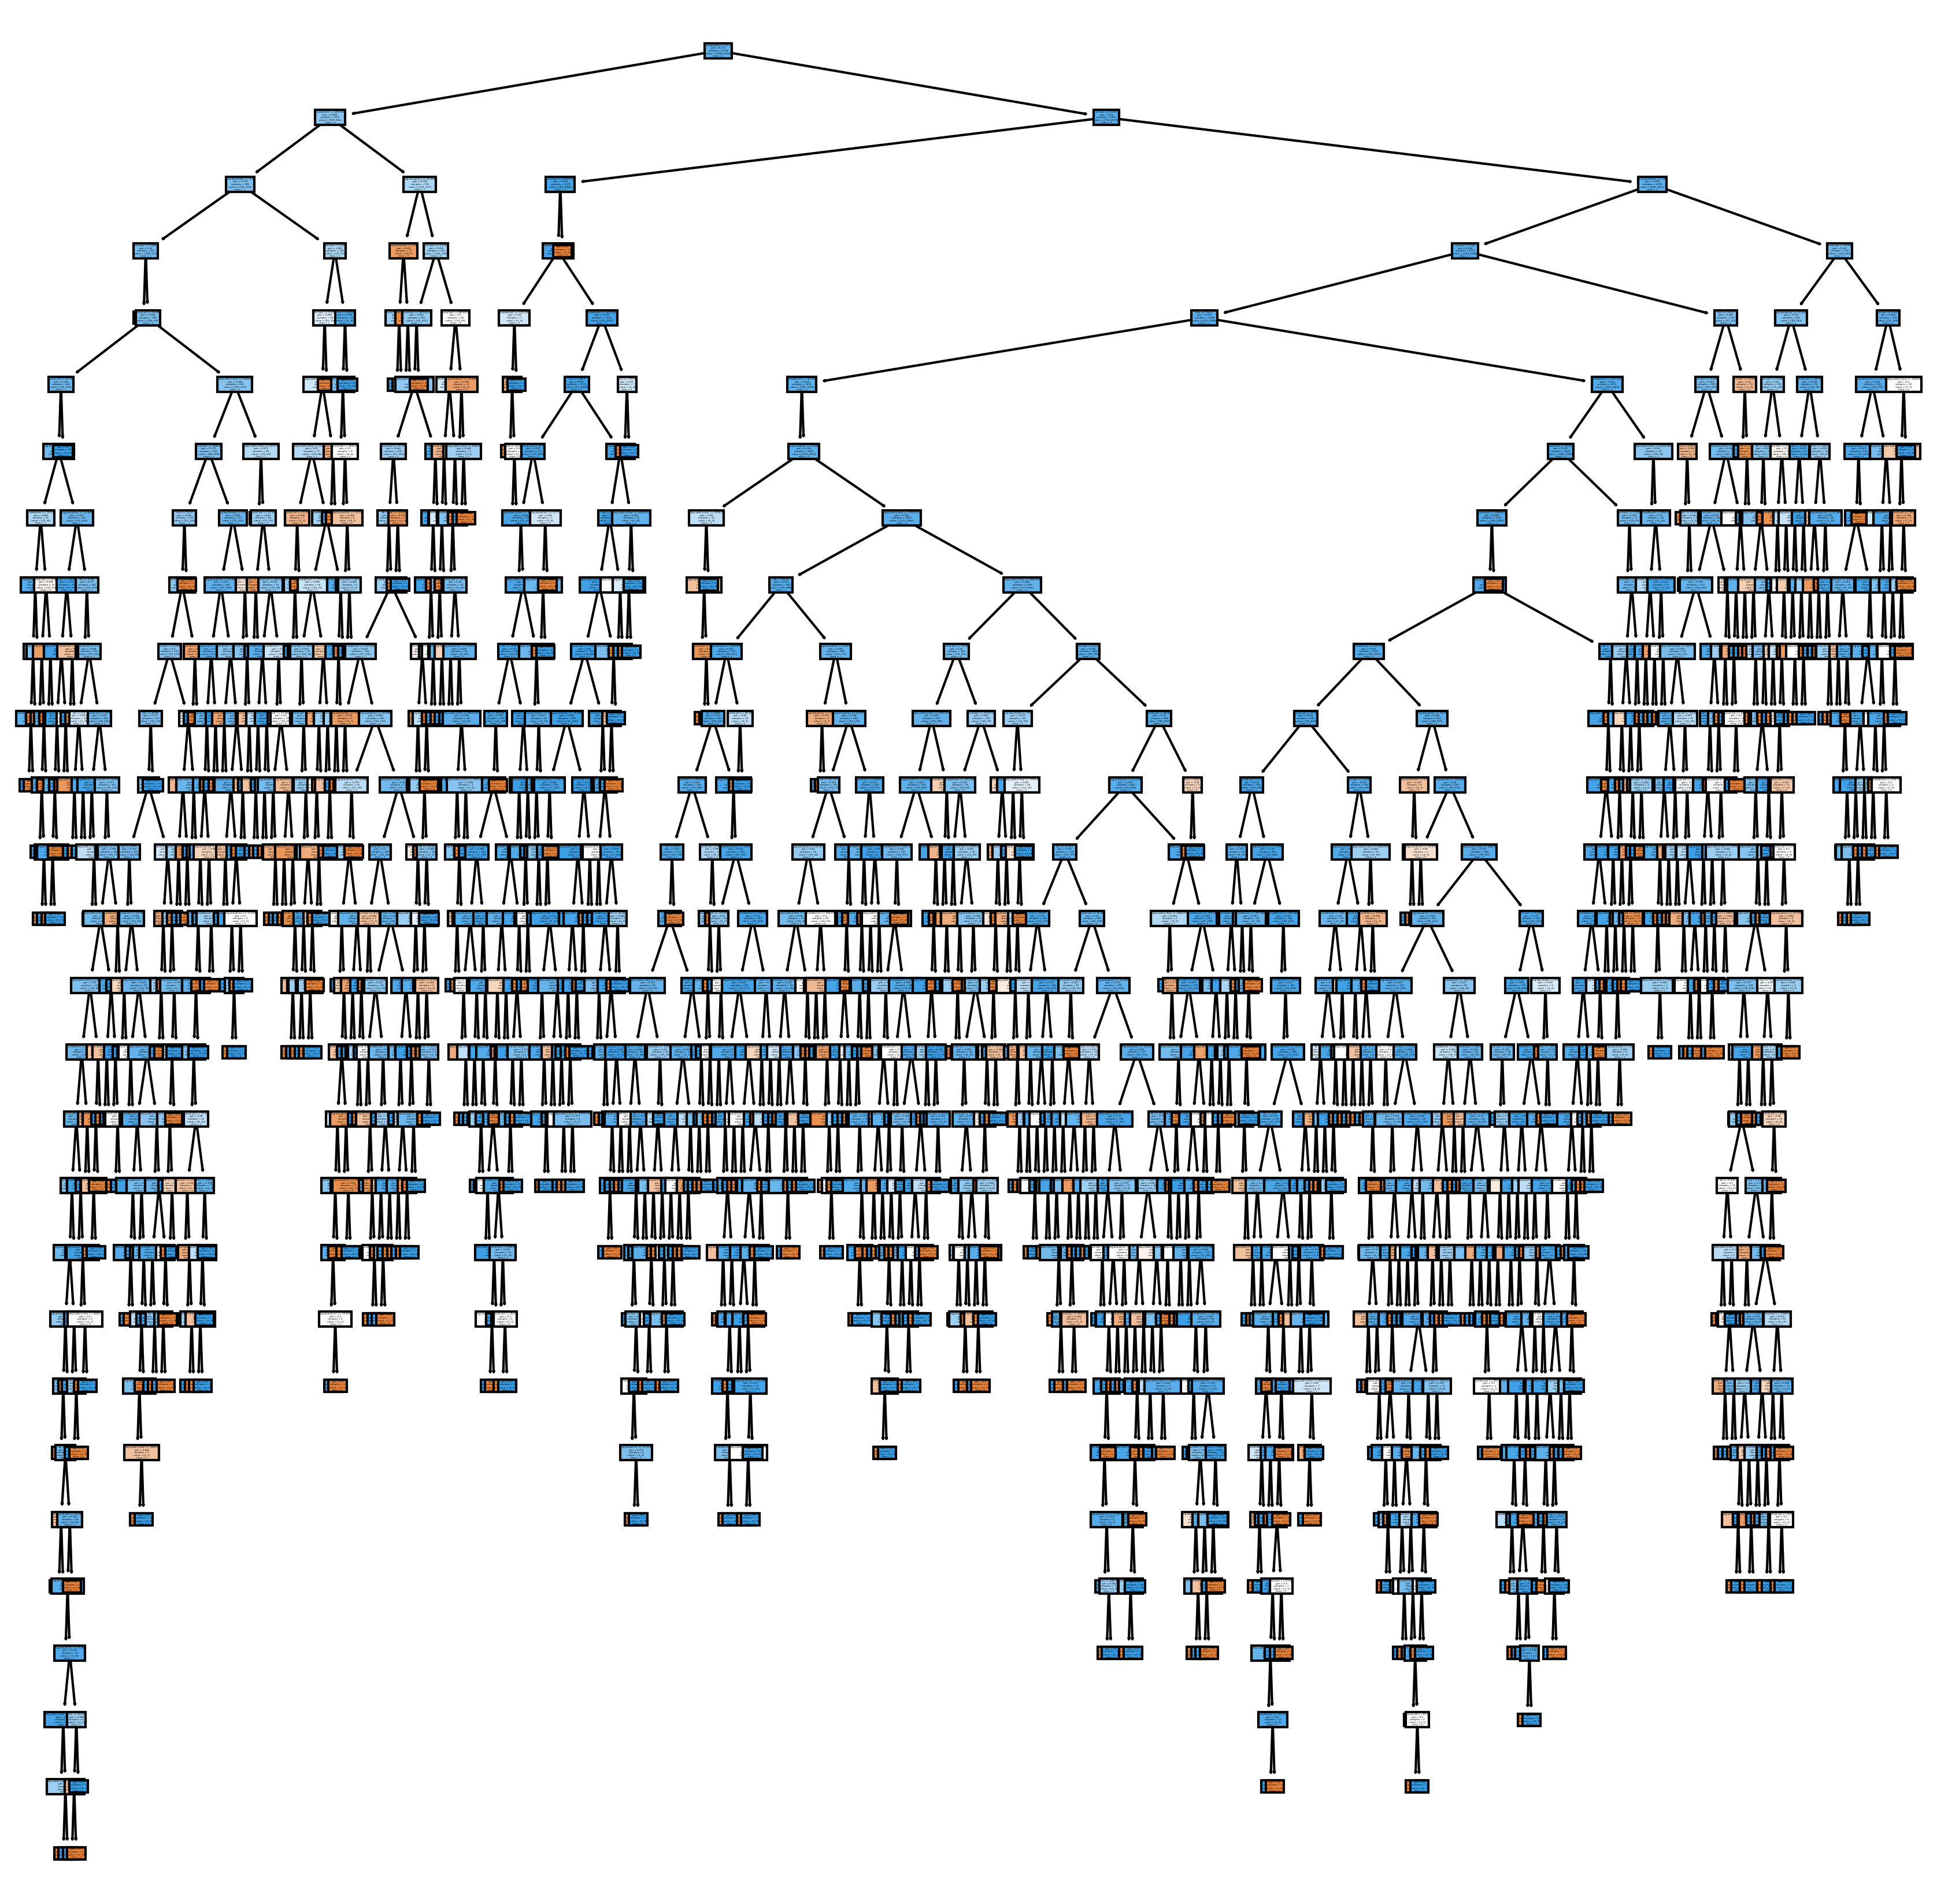

In [61]:
# another way to visualize the tree
# this tree has lots of branches
fn=['credit.policy','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (14,14), dpi=300)
tree.plot_tree(dTree,
               feature_names = fn,
               class_names=cn,
               filled = True);fig.savefig('imagename.png')

## 7. Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a confusion matrix and classfication report to evaluate our model.**

In [62]:
# create the predictions from the test set
predictions = dTree.predict(X_test)

In [63]:
# import the necessary libraries from sklearn.metrics
from sklearn.metrics import classification_report,confusion_matrix

## Evaluation using a confusion matrix
A confusion matrix is a great way to evaluate a classifcation model.<br>

In [64]:
#create the confusion matrix
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)
# Can we look at this in a better, more intuitive way? What does this mean?

[[  86  357]
 [ 408 2023]]


<Axes: >

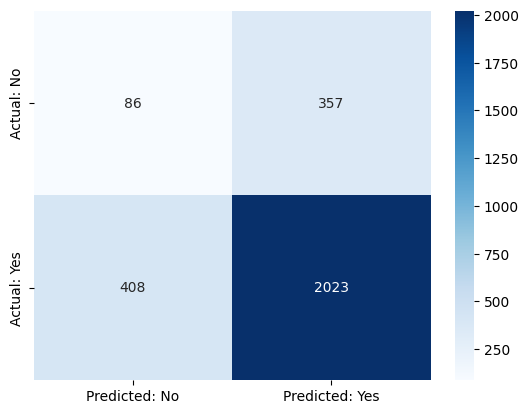

In [65]:
# use seaborn to make the confusion matrix more intuitive
# True Positives are Predicted Yes, Actual Yes or 2019
# True Negatives are Predicted No, Actual No or 93
# False Positives are Predicted Yes, Actual No or 350
# False Negatives are Predicted No, Actual Yes or 412
# Total = 2019+93+350+412 = 2874
# Remember this is the test set - 30% of total records

xlabels = ['Predicted: No','Predicted: Yes']
ylabels = ['Actual: No', 'Actual: Yes']
sns.heatmap(cf_matrix,xticklabels=xlabels,yticklabels=ylabels,annot=True,fmt='g',cmap='Blues')

<Axes: >

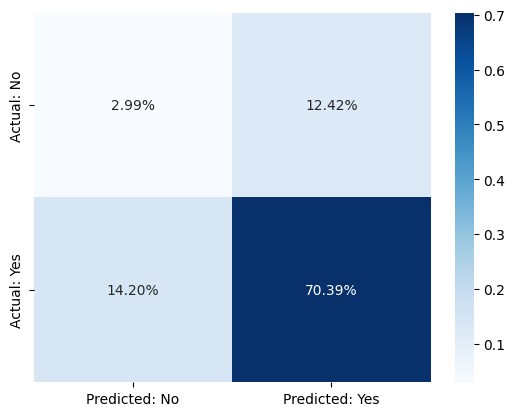

In [66]:
# Let's see the percentages in each column, this will help us understand the classification report
xlabels = ['Predicted: No','Predicted: Yes']
ylabels = ['Actual: No', 'Actual: Yes']
sns.heatmap(cf_matrix/np.sum(cf_matrix),xticklabels=xlabels,yticklabels=ylabels,annot=True,fmt='.2%',cmap='Blues')

## Here is the classification report built from the confusion matrix<br>

Learn more about the numbers here and see question below that you need to answer:  <a href="https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/">Explaining the Confusion Matrix</a>

In [67]:
#print the classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.17      0.19      0.18       443
           1       0.85      0.83      0.84      2431

    accuracy                           0.73      2874
   macro avg       0.51      0.51      0.51      2874
weighted avg       0.75      0.73      0.74      2874



## Question 5:  Using the link provided above, explain the classification report and confusion matrix charts that have been built. Is the F1 score the best measure of accuracy?

## Answer: The different confusion matrix charts all supplement different variables which is why some data is represented well in a specific type and why some is not. In this instance all of the class one predictions seem to be fairly accurate all being above 80 % of the time while recall has the highest accuracy at 0 with 19 % which is why the F1-score would not be the best for this data.

## 8. Training the Random Forest model

Now its time to train our Random Forest Model which will built lots of decision trees and average the results.  This is called an ensemble model and is usually a great model for data that has a target variable (supervised) and can benefit from decision tree analysis!

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(n_estimators=300)

In [74]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of fully.paid for the X_test data.**

In [71]:
rfc_pred = rfc.predict(X_test)

In [72]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.47      0.03      0.06       443
           1       0.85      0.99      0.92      2431

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.49      2874
weighted avg       0.79      0.85      0.78      2874



In [73]:
print(confusion_matrix(y_test,rfc_pred))

[[  14  429]
 [  16 2415]]


## Question 6:  Which model perfomed better?  Single Decision Tree or Random Forest? How can you tell?

## Answer: The single Decision tree preformed better due to it giving multiple outlooks and having a large amount of structure and backup with its data.

# The end!